# Calculus

## Differentiation

#### Simple Intuition
The main purpose of differentiation is to find the rate of change of a particular variable in response to a change in another variable.

#### Mathematical Intuition
Diving deeper into the Mathematics behind differential equations, we find that the differential of a function measures the change of the dependent variable (our Y value) in response to an infinitesmal increment in the independent variable (X value); for y = f(x). 
Given a function $f(x)$, the differential is:
$$ \lim_{x \to 0}\frac{f(x_2)-f(x_1)}{x_2-x_1} = \lim_{h\to 0 }\frac{f(x+h)-f(x)}{h}$$

In a form that we are all more familiar with, we can represent a differential equation as such:

*Lagrange Representation*
$$ f'(x)$$

*Leibnitz Representation*
$$ \frac{dy}{dx}$$

To find the rate of change/ slope of the curve, we need (1) the formula for our curve and (2) the point on the curve at which we are trying to find the rate of change.

Below we have a visual depiction. Let a function equal:
$$y = x^2 + 3x$$
$$\frac{dy}{dx} = 2x +3$$

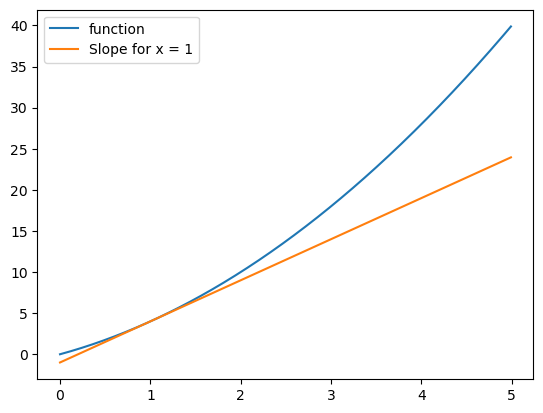

In [18]:
import numpy as np
import matplotlib.pyplot as plt
X = np.arange(0,5,0.01)
y = [x**2+3*x for x in X]
diff = [2*x +3 for x in X]
# diff gives our slope for each x value in X, it will then give different slopes based
# on the corresponding x values
# Let x =1 be our example; slope when x = 1 => 2(1)+3=5
deriv = [5*x -1 for x in X] #Shifted curve down by 1 unit to make it tangent
plt.plot(X,y,label = 'function')
plt.plot(X,deriv,label = 'Slope for x = 1')
plt.legend()


## Integration

### Simple Intuition
Integration involves finding the area under the curve. How I would explain integration is that it involves summing equal slices to find the whole. Intuitively, it is finding the area of many partitions of rectangles formed under the curve, given a small increment in x, and then summing the areas of these rectangles to get the area under the curve.

### Mathematical Intuition
Given a function f(x), an anti-derivative of f(x) - let's call it F(x), is such that:
$$F'(x) = f(x)$$
$$F(x)+c = \int f(x)dx$$

Definitions:
1. Anti-derivative of f(x): F(x) - simply what we get by integrating f(x). Note that F(x) and f(x) cannot be separated when using the term anti-derivative. F(x) is the anti-derivative of f(x) and f(x) particularly.
2. Integrand: f(x) - the integrand is the function getting integrated, or what we get by differentiating the anti-derivative

In the above, we have integrated f(x) with respect to x, which is what the dx stands for. Essentially what we are trying to figure out how much area have we covered if x has increased by a particular amount. In stochastic calculus, the importance of integration comes in solving differential equations. 

To put this into context, we usually begin to build a mathematical model for asset prices by first examining the behaviour of the stock price over time. In essence, we first build a model to simulate returns - these models/functions/differential equations usually constitute and drift term and a stochastic term. In order to get model for stock prices (rather than the change in stock price), we need to solve the differential equations.

### Taylor's Expansion

#### Simple Explanation
In simple terms, Taylor's Expansion is a method to estimate the new output (our dependent variable) given a very small change in the input (independent variable). For example, we know that f(x) = 100 when x = 10. Taylor's Expansion allows us to estimate f(x) given a small increment in x lets say 0.001 - where x =10.001, without actually knowing the original function.

One of the questions that I had asked when first learning about the Taylor's Expansion is "Why do we need to learn about this when we can simply put our input through the already known function to get the exact value, rather than estimate the new value with Taylor's Expansion?" Without diving into too much details, there are many reasons why Taylor's Expansion is useful, but for the purpose of option pricing, it allows us to convert the originally non-integrable change-in stock-price process (which is stochastic in nature) into one that we integrate, i.e solve for the stochastic differential equation.
Some of its' purposes are:
1. Solve differential equations - Some equations have no antiderivatives that can be expressed in familiar functions (meaning we can't easily differentiate it). This is our main purpose in option pricing.

2. Express ugly functions in easy to read functions ($sin(x)$ is an example)
#### Mathematical Notation
From a Mathematical standpoint, we define the Taylor Series as an infinite sum of terms that are expressed in terms of the function's derivatives at a single point.
We can express the Taylor series as follows:
$$f(x) = \sum^{\infty}_{n=0} \frac{f^n(a)}{n!}(x-a)^n$$
$$ = f(a)+(x-a)\frac{f'(a)}{1!}+(x-a)^2\frac{f''(a)}{2!}+\dots$$
In the above, a refers to the single point at which we are taking the derivatives about infinitely, and then summing these derivatives together.


#### Further explanation of the intuition behind Taylor's Expansion
In the above, we explained that Taylor's expansion is an infinite sum representation of a closed-form equation. The more terms present in the Taylor series, the more it converges to the closed-form solution. Below is a graphic representation of this phenomena and we will visualise it with the Taylor series for $\cos(x)$

Recall that the Taylor series can be expressed as:
$$\sum^{\infty}_{n=0}\frac{f^n(a)}{n!}(x-a)^n$$
Taking derivatives of $\cos(x)$,

$f'(x) = \frac{d\cos(x)}{dx}=-\sin(x)$

$f''(x) = -\frac{d\sin(x)}{dx} = \cos(x)$

We can express then $\cos(x)$ as:
$$\cos(x) = cos(0) - x\frac{(sin(0)}{1!}-x^2\frac{cos(0)}{2!}+x^3\frac{\sin(x)}{3!}+\dots$$
$$=1-\frac{x^2}{4}+\frac{x^4}{4!}+\dots$$

Below, we visualise how well the Taylor series can estimate the cos(x) function.

In [57]:
import math
from math import factorial as fact
X = np.arange(0,14,0.1) #Get our range of x values
y = [math.cos(x) for x in X] #Actual output

def taylor(x,n):
    '''
    x: represents our x / independent variable values
    n: the number of times we iterate through the Taylor series
    '''
    output = 1
    for i in range(1,n):
        if i%2!=0:
            output -=(x**(i*2))/fact(i*2)
        else:
            output +=(x**(i*2))/fact(i*2)
    return output
t = [taylor(x,2) for x in X] # Allow for just two iterations for the taylor series

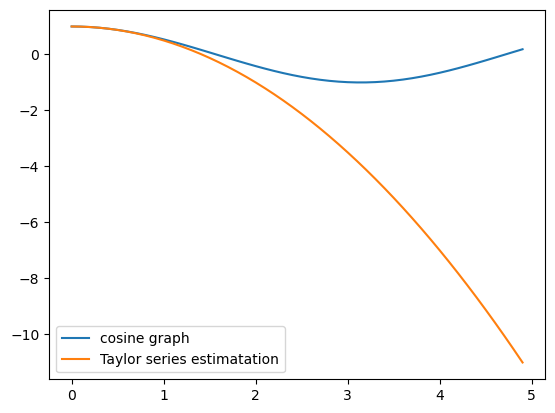

In [58]:
plt.plot(X[:50],y[:50], label = 'cosine graph')
plt.plot(X[:50],t[:50], label = 'Taylor series estimatation')
plt.legend()
# We see that the Taylor series does a good job with the estimation up till when x is approximately 1

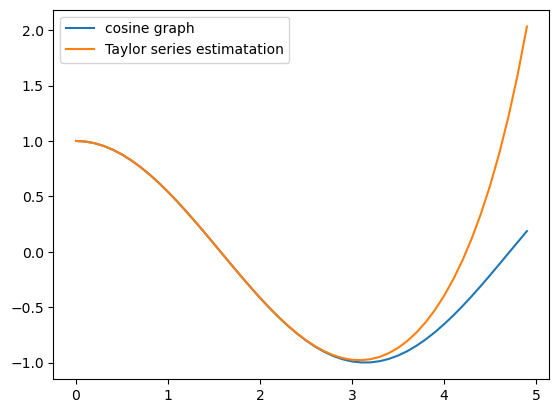

In [60]:
#Now we try 5 iterations
t = [taylor(x,5) for x in X] # Allow for just two iterations for the taylor series
plt.plot(X[:50],y[:50], label = 'cosine graph')
plt.plot(X[:50],t[:50], label = 'Taylor series estimatation')
plt.legend()
# With 5 iterations the Taylor series estimation estimates the cosine curve really well up till when x is approximately 3